# Hashfunktionen

Die wichtigste Komponente um einen Hashtabelle bauen zu können ist die Hashfunktion, welche uns für jedes Objekt einen Ganzzahligen Wert (den Hashwert) liefert. In Python berechnen wir dies mit der Funktion ```hash```. Für alle Standardtypen in Python ist die Hashfunktion bereits definiert.

In [1]:
print("Hashwert für String abc", hash("abc"))
print("Hashwert für Integer 7", hash(7))
print("Hashwert für Tuple (\"abc\", 7)", hash(("abc",7)))

Hashwert für String abc 133796411814046842
Hashwert für Integer 7 7
Hashwert für Tuple ("abc", 7) -7128084033343693202


Sobald wir benutzerdefinierte Typen definieren, bei denen wir auch Gleichheit via der __eq__ Methode definieren, müssen wir auch eine eigene Hashfunktion definieren. Wir schauen uns dies an einem Beispiel an. Wir implementieren eine Klasse ```Date```:

In [2]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
    
    def __eq__(self, that):
        return self.year == that.year \
                and self.month == that.month \
                and self.day == that.day

Wenn wir nun die Funktion ```hash``` aufrufen, bekommen wir eine Fehlermeldung

In [3]:
hash(Date(19, 4, 2018))

TypeError: unhashable type: 'Date'

Damit unsere Klasse Hashing unterstützt, und damit als Schlüssel für eine Hashtabelle benutzt werden kann, müssen wir die Methode ```___hash___``` implementieren:

In [4]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
    
    def __eq__(self, that):
        return self.year == that.year \
                and self.month == that.month \
                and self.day == that.day
            
    def __hash__(self):
        return hash((self.day, self.month, self.year))
    
    def __str__(self):
        return str((self.day, self.month, self.year))

Nun gibt uns die Funktion ```hash``` den von der ```__hash___``` Methode berechnete Wert zurück: 

In [5]:
hash(Date(19, 4, 2018))

-657811993417352721

Die Strategie, die wir bei der Implementation der ```___hash__``` Methode verfolgt haben ist ganz einfach. Wir haben aus den Feldern ein Tupel erstellt, und dann ausgenutzt, dass ein Tupel von Standardtypen in Python bereits die hash Funktion unterstützt. Dies ist nicht einfach ein billiger Trick, sondern die von Python empfohlene Strategie. 

>Called by built-in function hash() and for operations on members
of hashed collections including set, frozenset, and dict. ```__hash__()```
should return an integer. The only required property is that objects
which compare equal have the same hash value; it is advised to
mix together the hash values of the components of the object that
also play a part in comparison of objects by packing them into a
tuple and hashing the tuple.

> Python Language Reference - Section 3: Data Model

### Modulares Hashing

Für die Implementation von Hashtabellen interessiert uns nicht der wirkliche Hashwert, sondern wir wollen eine Zahl zwischen $0$ und $M$ (wobei $M$ die Tabellengrösse ist), die wir als Arrayindex verwenden können. Wir definieren uns die Funktion ```modHash```.

In [6]:
import sys
def modHash(key, M):
        positiveHash = hash(key) % ((sys.maxsize + 1) * 2) 
        return positiveHash % M



Der Hashwert, der ja auch negativ sein kann, wird hier zuerst auf eine positiven Wert abgebildet und dann modulo $M$ gerechnet.

### Gleichverteilung von Hashwerten

Eine gute Hashfunktion sollte die Werte etwa gleichverteilen. Wir können dies überpüfen, indem wir zufällige Objekte eines Typs generieren, und den modularen Hashwert plotten.

In [7]:
import random
def randomDate():
    return Date(random.randint(1, 31), random.randint(1, 12), random.randint(1900, 2018))

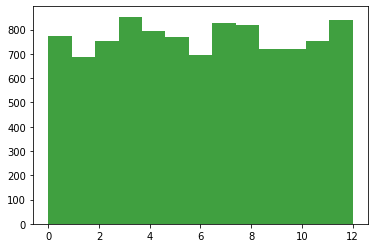

In [8]:
import matplotlib.pyplot as plt

M = 13
hashes = [modHash(randomDate(), M) for _ in range(0, 10000)]
n, bins, patches = plt.hist(hashes, M, facecolor='green', alpha=0.75)
plt.show()



Wir sehen, dass die Schlüssel in diesem Fall gleichverteilt sind.

### Übung:

* Was passiert wenn sie zur Hashberechnung die Tage auslassen?


### Kollisionen

Wie besprochen, kommt es beim Hashing mit grosser Wahrscheinlichkeit zu Kollisionen. Die Kollisionswahrscheinlichkeit kann mit der Formel für das Geburtstagsparadox abgeschätzt werden. Wir simulieren dies hier, indem wir Hashwerte für zufälligen Datumsobjekte generieren, bis wir eine erste Kollision haben.

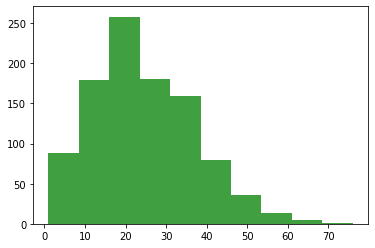

In [9]:
M=365 # Grösse der Tabelle

numExperiments = 1000
earliestCollisionList = []
for i in range(0, numExperiments):
    hashesSeen = set()
    for numElements in range(0, M):
        newHash = modHash(randomDate(), M)
        if newHash in hashesSeen:
            earliestCollisionList.append(numElements)
            break
        else:
            hashesSeen.add(newHash)
            
n, bins, patches = plt.hist(earliestCollisionList, 10, facecolor='green', alpha=0.75)
plt.show()

Der Plot Zeigt die Verteilung der ersten Kollision. Wir sehen, dass wir auch bei 1000 Experimenten, nie mehr als 68 Hashwerte generieren können, ohne dass es zu einer Kollision kommt. In den meisten Fällen entsteht die erste Kollistion bereits nach etwa 20 Werten. 

### Übung

* Wie verändert sich der Wert, wenn der Hashwert nicht mehr von allen Feldern abhängt?
* Was passiert wenn die Tabelle sehr gross wird?